In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/telco_churn.csv")

# Show top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Check nulls
print("Null values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Check class balance
print("\nChurn value counts:\n", df['Churn'].value_counts())


Null values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        

In [3]:
# Drop customerID - it's just an identifier
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (some values are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Show how many nulls appeared after conversion
print("Nulls after conversion:\n", df.isnull().sum())


Nulls after conversion:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [4]:
# Drop rows with null TotalCharges (only a few)
df.dropna(inplace=True)

# Encode target: Churn (Yes → 1, No → 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Confirm changes
print("Remaining nulls:\n", df.isnull().sum())
print("\nTarget encoded values:\n", df['Churn'].value_counts())


Remaining nulls:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target encoded values:
 Churn
0    5163
1    1869
Name: count, dtype: int64


In [5]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:\n", categorical_cols)

# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show final shape
print("\nEncoded dataframe shape:", df_encoded.shape)
df_encoded.head()


Categorical Columns:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Encoded dataframe shape: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5625, 30)
Test shape: (1407, 30)


In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Initialize and train
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Score: {auc:.4f}")


AUC-ROC Score: 0.8197


C:\Users\Rohan\OneDrive - Drexel University\Desktop\ChurnPrediction\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict labels
y_pred = model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix:
 [[890 143]
 [169 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

Accuracy: 0.7783


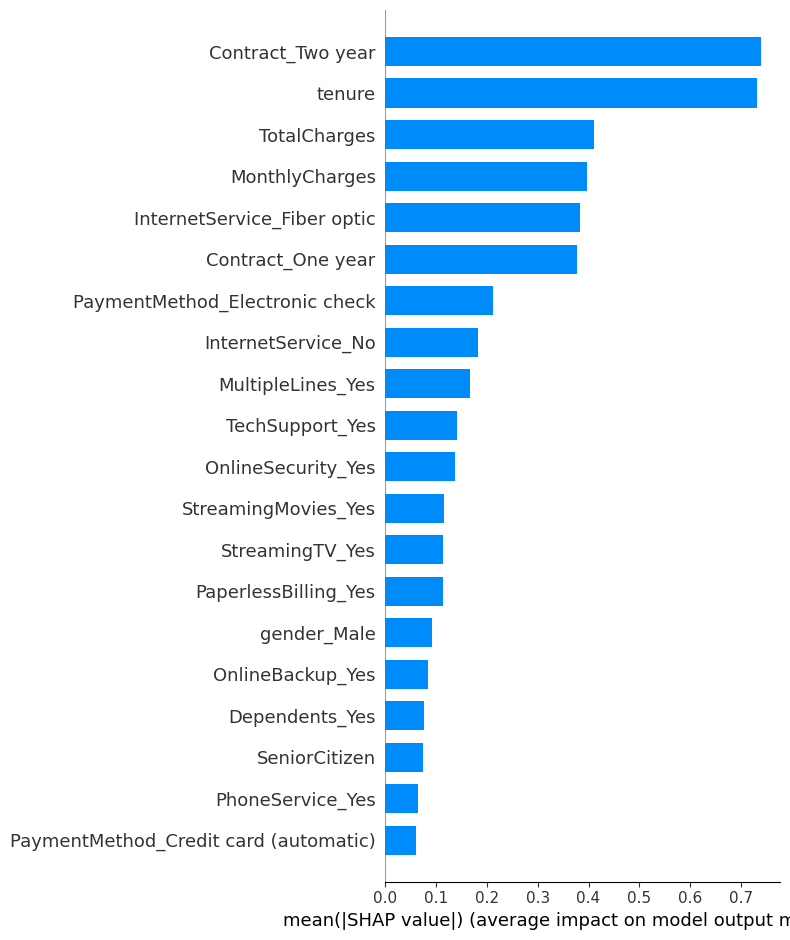

In [9]:
import shap

# Initialize TreeExplainer for XGBoost
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)

# Print top features by importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [10]:
import joblib

# Save model
joblib.dump(model, '../src/churn_xgb_model.pkl')

# Save columns
joblib.dump(X_train.columns.tolist(), '../src/feature_columns.pkl')

print("✅ Model and feature columns saved")


✅ Model and feature columns saved
